<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/magnetar.py/Modified_BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the entire repository

In [6]:
# Get the entire archive (maybe you already have it)
! git clone https://github.com/UBC-Astrophysics/QEDSurface.git

Cloning into 'QEDSurface'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 2655 (delta 29), reused 31 (delta 15), pack-reused 2606
Receiving objects: 100% (2655/2655), 223.01 MiB | 34.11 MiB/s, done.
Resolving deltas: 100% (1081/1081), done.
Checking out files: 100% (2015/2015), done.


In [1]:
# change the directory if you have to
import os
os.chdir('QEDSurface/magnetar.py')


In [2]:
# update just in case
! git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/UBC-Astrophysics/QEDSurface
   7ba8faf..01eb87e  master     -> origin/master
Updating 7ba8faf..01eb87e
Fast-forward
 magnetar.py/Magnetar/simple_atmospheres.py | 1 -
 1 file changed, 1 deletion(-)


# Load Libraries

In [3]:
import Magnetar
import numpy as np


import matplotlib.pyplot as plt

# Create the double black-body surface map

## Put in the surface maps using the dipole pattern

In [4]:
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,1,1e13,70565.,fixed_ions=False)
mysurfmodel=Magnetar.dipole_model(Magnetar.modified_bb_atmo,0.6,1.25e14,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
mysurfmodel_magneto=Magnetar.dipole_model(Magnetar.Thompson_Kostenko_Magnetosphere,0.6,1.25e14)


## Add the polar cap and its edge

In [5]:
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,1,1e13,70565.,fixed_ions=False)
# The first two are the hot spot
cap1=Magnetar.modified_bb_atmo(1.9,1.25e14,0.0,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
cap2=Magnetar.modified_bb_atmo(1.9,1.25e14,1,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
# This is just past the edge of the hot spot (so cold)
cap3=Magnetar.modified_bb_atmo(0.6,1.25e14,1.1,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
mysurfmodel.add_patch(cap1,0)
mysurfmodel.add_patch(cap2,2)
mysurfmodel.add_patch(cap3,2.2)
mysurfmodel.sort_patches()

## Add the back of the star by copying from the front

In [6]:
aa=mysurfmodel.mcolat
# copy the front surface to the back of the star
# add the angles
mysurfmodel.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
mysurfmodel.patches=mysurfmodel.patches+mysurfmodel.patches[::-1]

In [7]:
aa=mysurfmodel_magneto.mcolat
# copy the front surface to the back of the star
# add the angles
mysurfmodel_magneto.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
mysurfmodel_magneto.patches=mysurfmodel_magneto.patches+mysurfmodel_magneto.patches[::-1]

# Work with a single orientation

## Load the propagation file (pfield)

In [8]:
pfield_test=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')

## Calculate intensities across the image

In [13]:
pfield_test.recalculate(1.65426,mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

(14523.639474500727, -14486.308086686999)

In [14]:
aa=mysurfmodel.mcolat
# copy the front surface to the back of the star
# add the angles
mysurfmodel.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
mysurfmodel.patches=mysurfmodel.patches+mysurfmodel.patches[::-1]

In [21]:
pfield_test.recalculate(1.65426,mysurfmodel_magneto,gtt=(1-2*2.0/10.0)**0.5)

(0.05921293062183425, 0.05893262525319075)

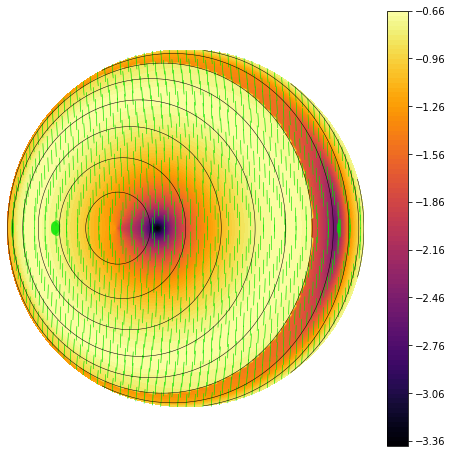

In [22]:
pfield_test

In [19]:
pfield_test.recalculate(1.65426,mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

(14523.639474500724, -14486.308086686995)

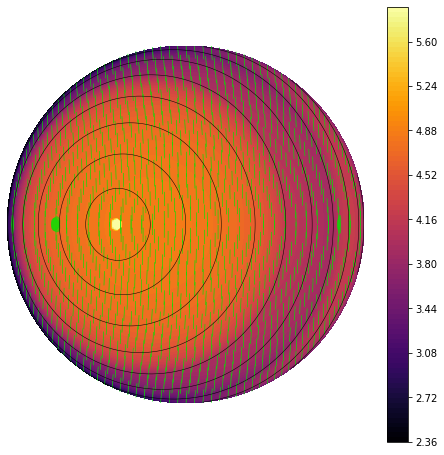

In [20]:
pfield_test

In [23]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)
ivec=pfield_test.iint
qvec=pfield_test.qint


In [24]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(mysurfmodel_magneto,gtt=(1-2*2.0/10.0)**0.5)
ivec2=pfield_test.iint
qvec2=pfield_test.qint


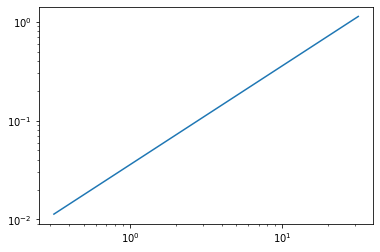

In [29]:
plt.loglog(ee,ivec2)

## Let's do some plots

In [25]:
# load a datafile
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [26]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.6e22*ssabs)

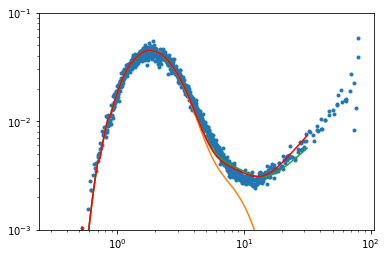

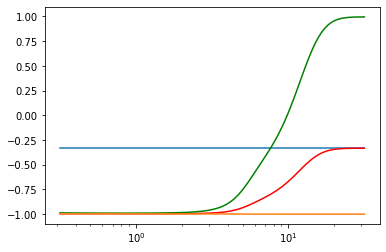

In [37]:
# plot the model against the data
norm=2.5e5
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivec/norm)
plt.loglog(ee,totabs*(ivec/norm+ivec2*0.005))
plt.loglog(ee,totabs*(ivec/norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec/norm)/(ivec/norm+ee**1.3/1.2e4),'r')
plt.plot(ee,(qvec2*0.005+qvec/norm)/(ivec/norm+ivec2*0.005),'g')
plt.plot(ee,qvec/ivec)
#plt.plot([ee[0],ee[-1]],[-1.0,-1.0],'k')
plt.xscale("log")
plt.ylim(-1.1,1.1)
plt.show()

# Work with all orientations

## Load the orientation files

In [ ]:
import glob
pfieldarray_test=Magnetar.pfield_array().loaddata(glob.glob('Sample_Pfields/pfield_models_QED/*'))

## Calculate the mean intensities for all orientations and energies

In [ ]:
pfieldarray_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

/content/QEDSurface/magnetar.py/Magnetar/simple_atmospheres.py:5: RuntimeWarning: overflow encountered in expm1
  return 208452.792 * ee**3 / np.expm1(ee / tt) / 2


In [ ]:
print(pfieldarray_test)


#
# class pfield
#
# filename      Sample_Pfields/pfield_models_QED/pfield_5keV_0.deg
#
#   Phi[rad]  Energy[keV]            I          Q/I
           0     0.316228       4553.9  8.70627e-09
           0     0.331285      4928.96  8.72136e-09
           0      0.34706      5331.18  8.73726e-09
           0     0.363585      5761.97  8.75401e-09
           0     0.380897      6222.74  8.77165e-09
           0     0.399034      6714.88  8.79024e-09
           0     0.418034      7239.71  8.80983e-09
           0      0.43794       7798.5  8.83046e-09
           0     0.458792      8392.44  8.85221e-09
           0     0.480638      9022.56  8.87512e-09
           0     0.503524      9689.77  8.89927e-09
           0       0.5275      10394.8  8.92471e-09
           0     0.552617        11138  8.95153e-09
           0      0.57893      11919.8  8.97979e-09
           0     0.606496      12739.9  9.00958e-09
           0     0.635375      13597.9  9.04096e-09
           0     0.665629  

## Plot the mean intensity over the orientations

In [ ]:
ivec=[pf.iint  for pf in pfieldarray_test.pfi]
qvec=[pf.qint  for pf in pfieldarray_test.pfi]
ee=pfieldarray_test.pfi[0].ebins

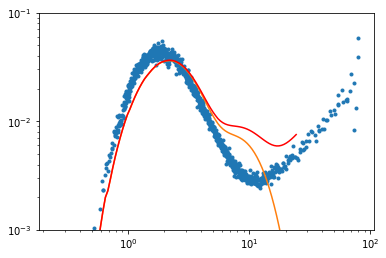

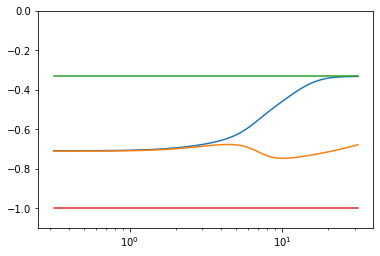

In [ ]:
totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
plt.loglog(datae,dataf,'.')
plt.loglog(ee*(1-2*2.0/10.0)**0.5,totabs*totivec*ee/18e5)
plt.loglog(ee*(1-2*2.0/10.0)**0.5,totabs*(totivec*ee/18e5+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+totqvec/18e5)/(totivec/18e5+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

## Plot the intensity for several orientations

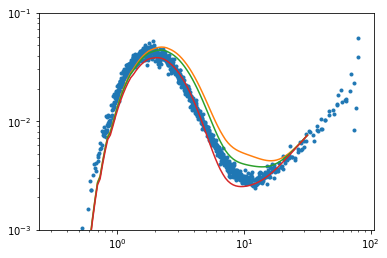

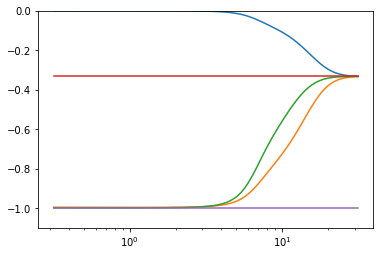

In [ ]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivec[0]/6e5+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[3]/6e5+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[6]/6e5+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[0]/6e5)/(ivec[0]/6e5+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]/6e5)/(ivec[3]/6e5+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[6]/6e5)/(ivec[6]/6e5+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0.0)
plt.show()

# Experiment with QED-on and QED-off

## Load a QED-off propagation model

In [ ]:
pf30=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pf30.recalculate(5,mysurfmodel)

(7642.629319274233, -1465.453696045495)

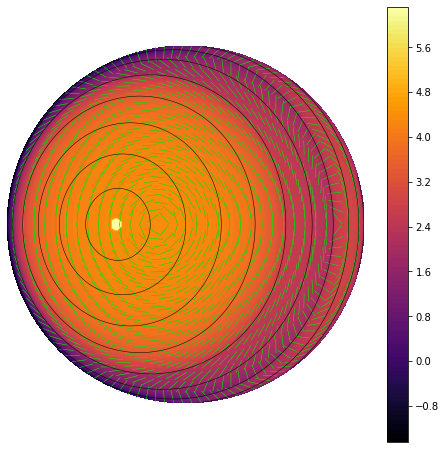

In [ ]:
q=pf30.plot(datamap=np.log10(pf30.data['X']+pf30.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30NoQED.pdf',bbox_inches='tight')

## Load a QED-on propagation model

In [ ]:
pf30Q=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')
pf30Q.recalculate(5,mysurfmodel)


(7638.977067939791, -7628.458170449548)

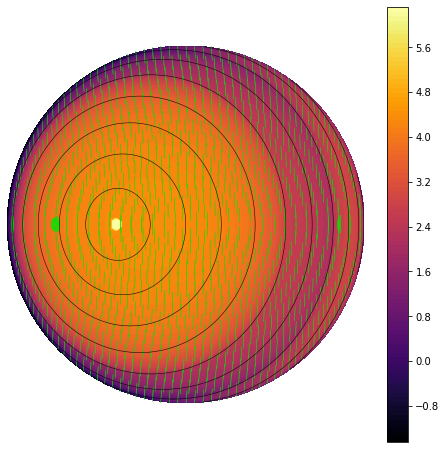

In [ ]:
q=pf30Q.plot(datamap=np.log10(pf30Q.data['X']+pf30Q.data['O']),cmap='inferno',ellipsecolor=[0,0.9,0])
q.savefig('HS30.pdf',bbox_inches='tight')